<a href="https://colab.research.google.com/github/duckmanBR/desafios-dio-acw/blob/main/desafio_treinamento_rede_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalação do ultralytics, mantenedor/otimizador do Yolo em versões mais recentes
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [33]:
# imports necessários para a execução
from IPython.display import Image, display
from ultralytics import YOLO
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [30]:
# carregamento do modelo pré-treinado Yolo v8 modelo n, que é o mais simples
model = YOLO("yolov8n.pt")

# informações do modelo (apenas informativo)
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [32]:
# usaremos o dataset african-wildlife, presente já no pacote da ultralytics contendo 1504 imagens distribuídas em 75-15-15 (treino/validação/teste) com 20 épocas e tamanho de imagem 640
train_results = model.train(data="african-wildlife.yaml", epochs=20, imgsz=640)

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=african-wildlife.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/datasets/african-wildlife/train/labels.cache... 1052 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1052/1052 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/african-wildlife/valid/labels.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.21G     0.7865      1.524      1.177         66        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]

                   all        225        379      0.798      0.667      0.776      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.13G     0.8828      1.413      1.227         77        640: 100%|██████████| 66/66 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


                   all        225        379      0.734      0.665      0.717      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.17G     0.9403      1.396      1.273         64        640: 100%|██████████| 66/66 [00:18<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]

                   all        225        379      0.725      0.603      0.691       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.14G     0.9407      1.283      1.262         52        640: 100%|██████████| 66/66 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]

                   all        225        379      0.701      0.673      0.764      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.14G     0.8991       1.19      1.237         49        640: 100%|██████████| 66/66 [00:19<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        225        379       0.79      0.638      0.711      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.27G     0.8831      1.131      1.228         57        640: 100%|██████████| 66/66 [00:18<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        225        379      0.819      0.722      0.832      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.17G     0.8974      1.061      1.222         41        640: 100%|██████████| 66/66 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]

                   all        225        379      0.774      0.687      0.771      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.14G     0.8516     0.9824      1.196         38        640: 100%|██████████| 66/66 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        225        379      0.861      0.786      0.881      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.16G     0.8154     0.9465      1.179         61        640: 100%|██████████| 66/66 [00:18<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        225        379      0.877      0.774      0.863      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.17G     0.7829      0.873      1.151         46        640: 100%|██████████| 66/66 [00:19<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

                   all        225        379      0.851      0.786      0.873      0.672


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.12G     0.7461     0.8878      1.141         22        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        225        379      0.853      0.745      0.833      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.14G      0.719     0.7834      1.115         33        640: 100%|██████████| 66/66 [00:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        225        379      0.871      0.819      0.907      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.12G     0.6795     0.7375      1.096         31        640: 100%|██████████| 66/66 [00:20<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        225        379      0.898      0.836      0.898      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.14G     0.6602     0.6906      1.082         31        640: 100%|██████████| 66/66 [00:17<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        225        379      0.914      0.838      0.929      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.14G     0.6375     0.6393      1.075         20        640: 100%|██████████| 66/66 [00:18<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]

                   all        225        379      0.925      0.837      0.918      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.12G       0.62     0.6031      1.043         14        640: 100%|██████████| 66/66 [00:19<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]

                   all        225        379       0.94       0.83      0.924      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.12G     0.5952     0.5574      1.023         20        640: 100%|██████████| 66/66 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

                   all        225        379      0.916      0.852      0.931      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.14G     0.5684     0.5281       1.01         23        640: 100%|██████████| 66/66 [00:19<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]

                   all        225        379      0.937      0.883      0.948      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.12G     0.5505     0.5036     0.9936         27        640: 100%|██████████| 66/66 [00:18<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]

                   all        225        379      0.924      0.892       0.95      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.14G     0.5376     0.4843     0.9844         19        640: 100%|██████████| 66/66 [00:17<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        225        379      0.931      0.889      0.951      0.785



20 epochs completed in 0.125 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]


                   all        225        379      0.931      0.889      0.951      0.784
               buffalo         62         89      0.969      0.899      0.962      0.806
              elephant         53         91      0.866      0.868      0.921      0.752
                 rhino         55         85      0.929      0.941      0.957      0.823
                 zebra         59        114       0.96      0.848      0.963      0.757
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


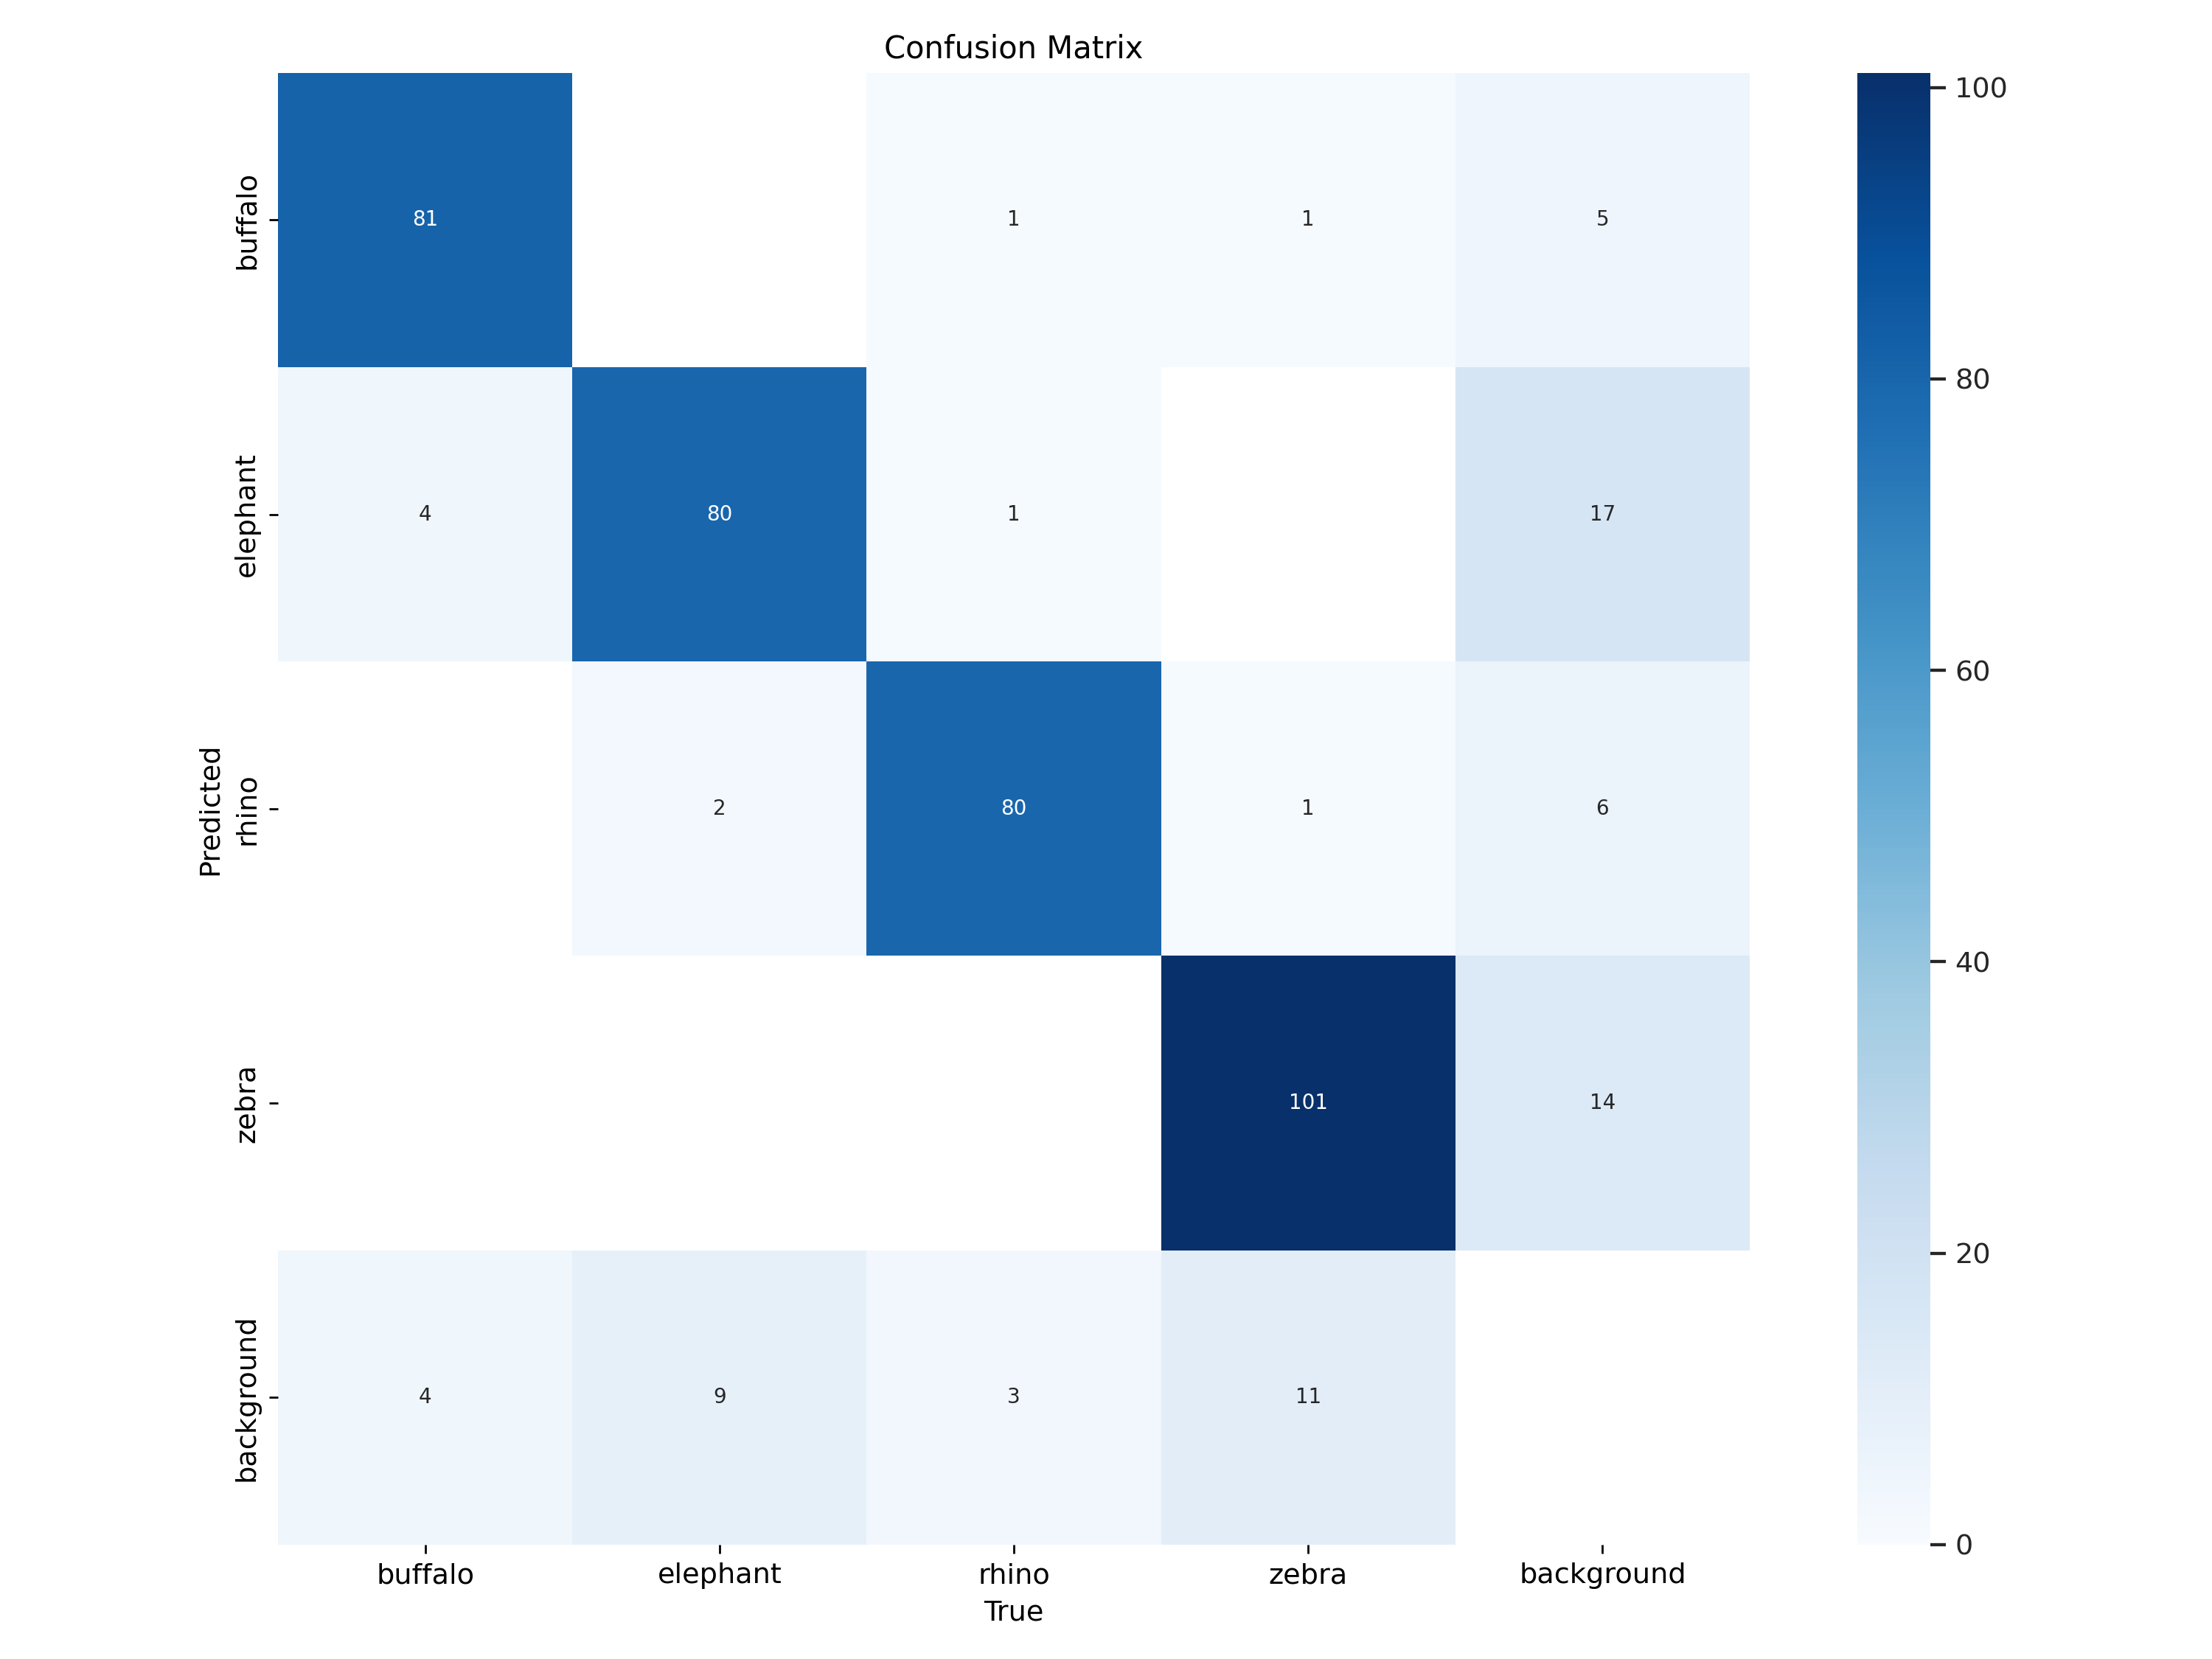

In [40]:
# visualiza a matriz de confusão do modelo
Image(filename=f"{train_results.save_dir}/confusion_matrix.png" , width=1024)

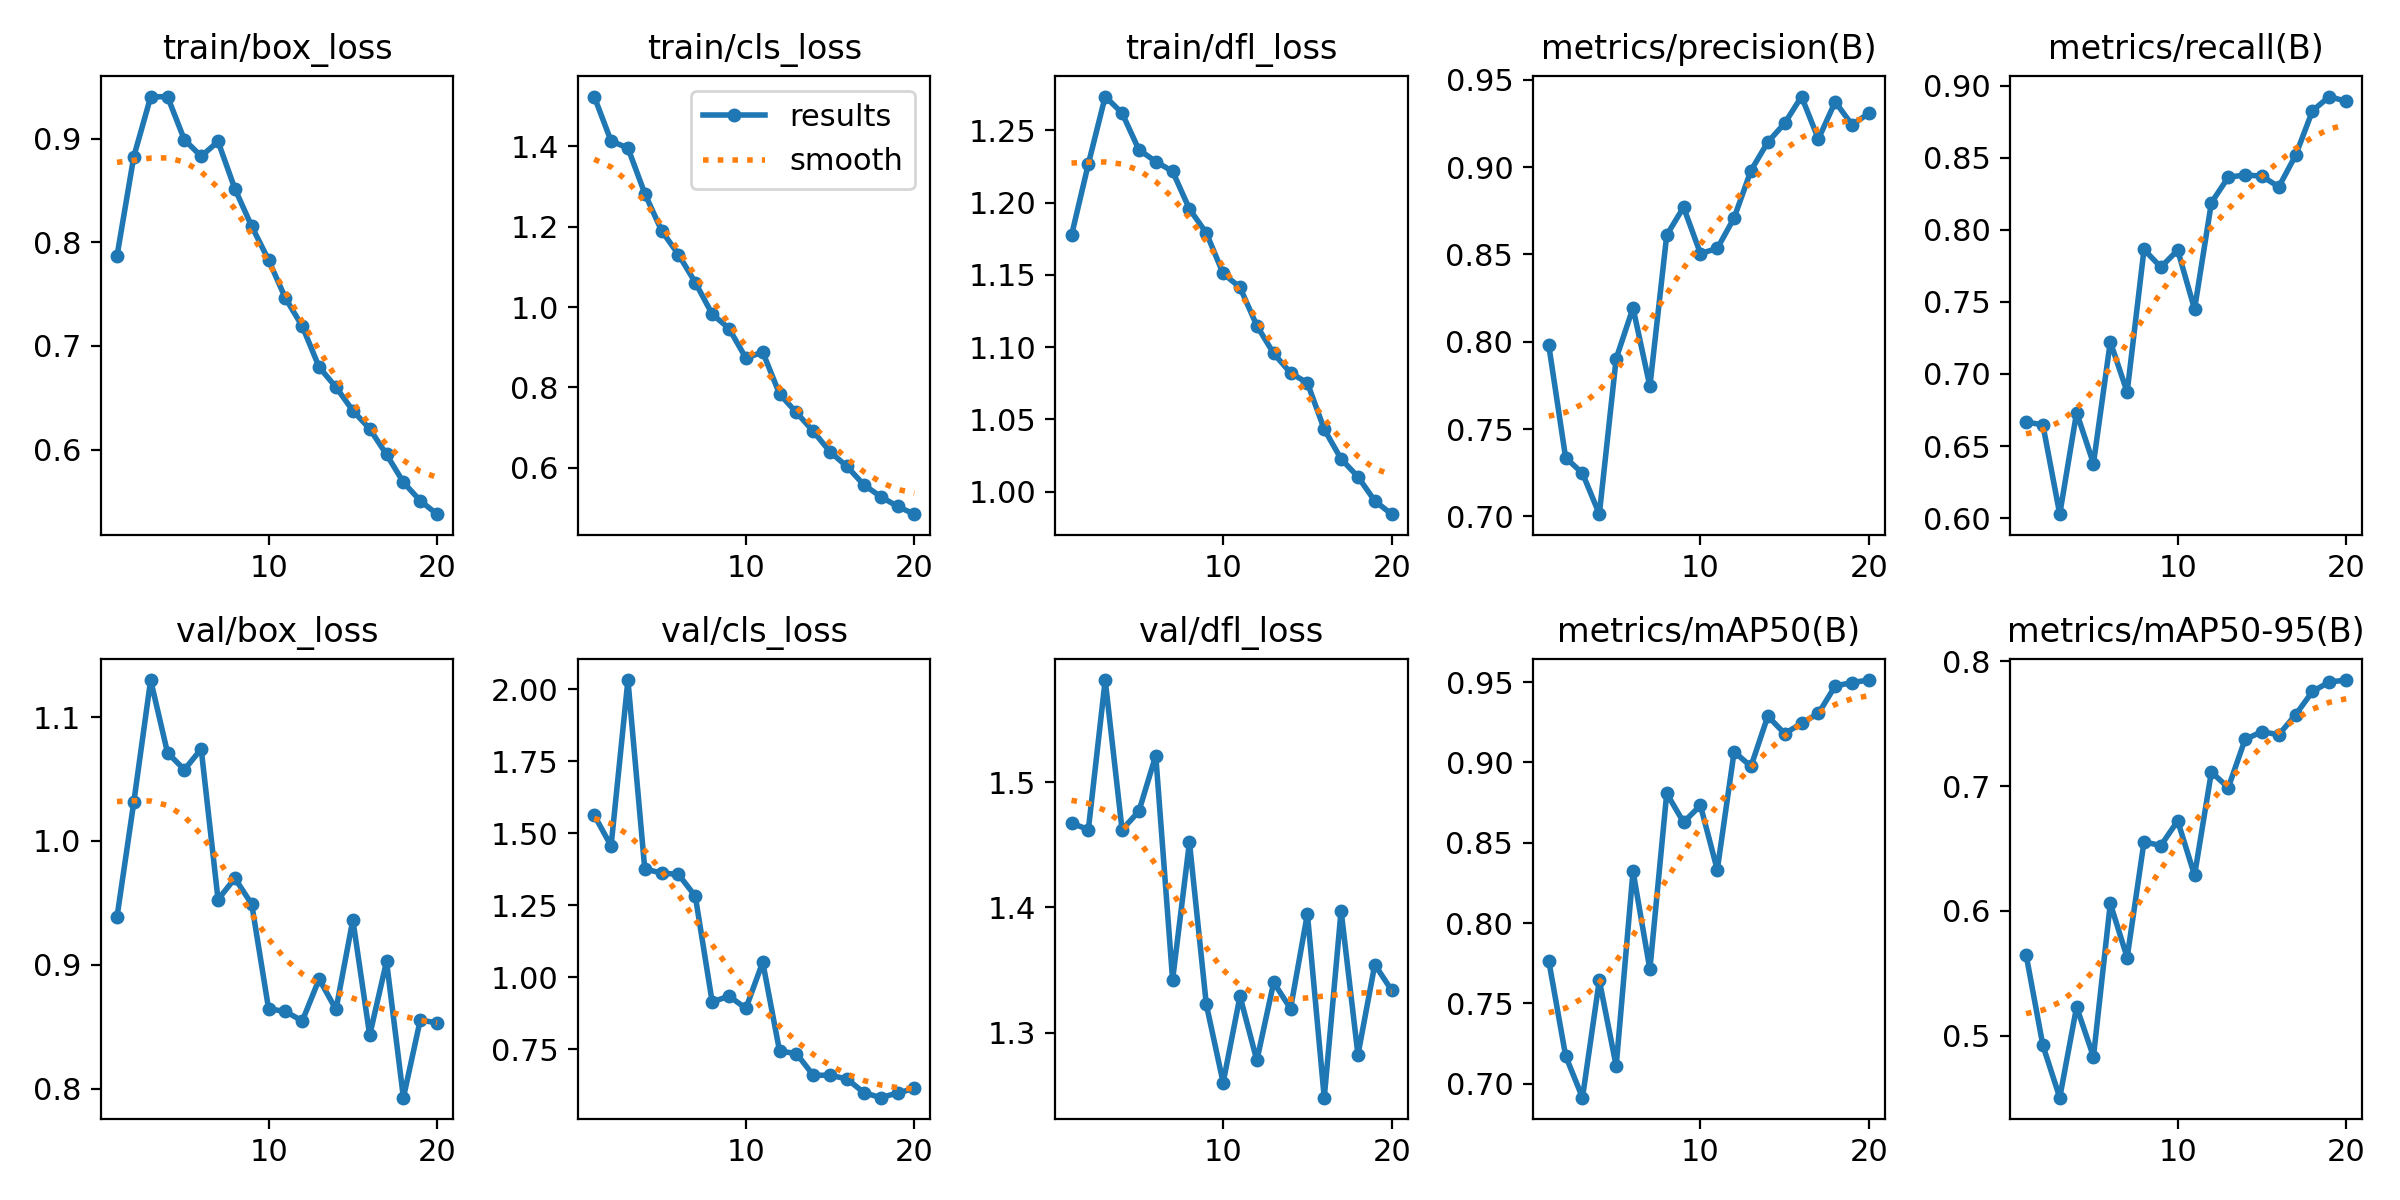

In [34]:
# visualiza as métricas do modelo
Image(filename=f"{train_results.save_dir}/results.png" , width=1024)

In [35]:
# realiza a validação do modelo
validation_results = model.val(data="african-wildlife.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/african-wildlife/valid/labels.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.78it/s]


                   all        225        379      0.935      0.896       0.94      0.811
               buffalo         62         89      0.988      0.908      0.952      0.831
              elephant         53         91      0.857      0.857      0.907      0.766
                 rhino         55         85      0.932      0.941      0.959      0.862
                 zebra         59        114      0.962      0.877       0.94      0.785
Speed: 0.9ms preprocess, 6.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


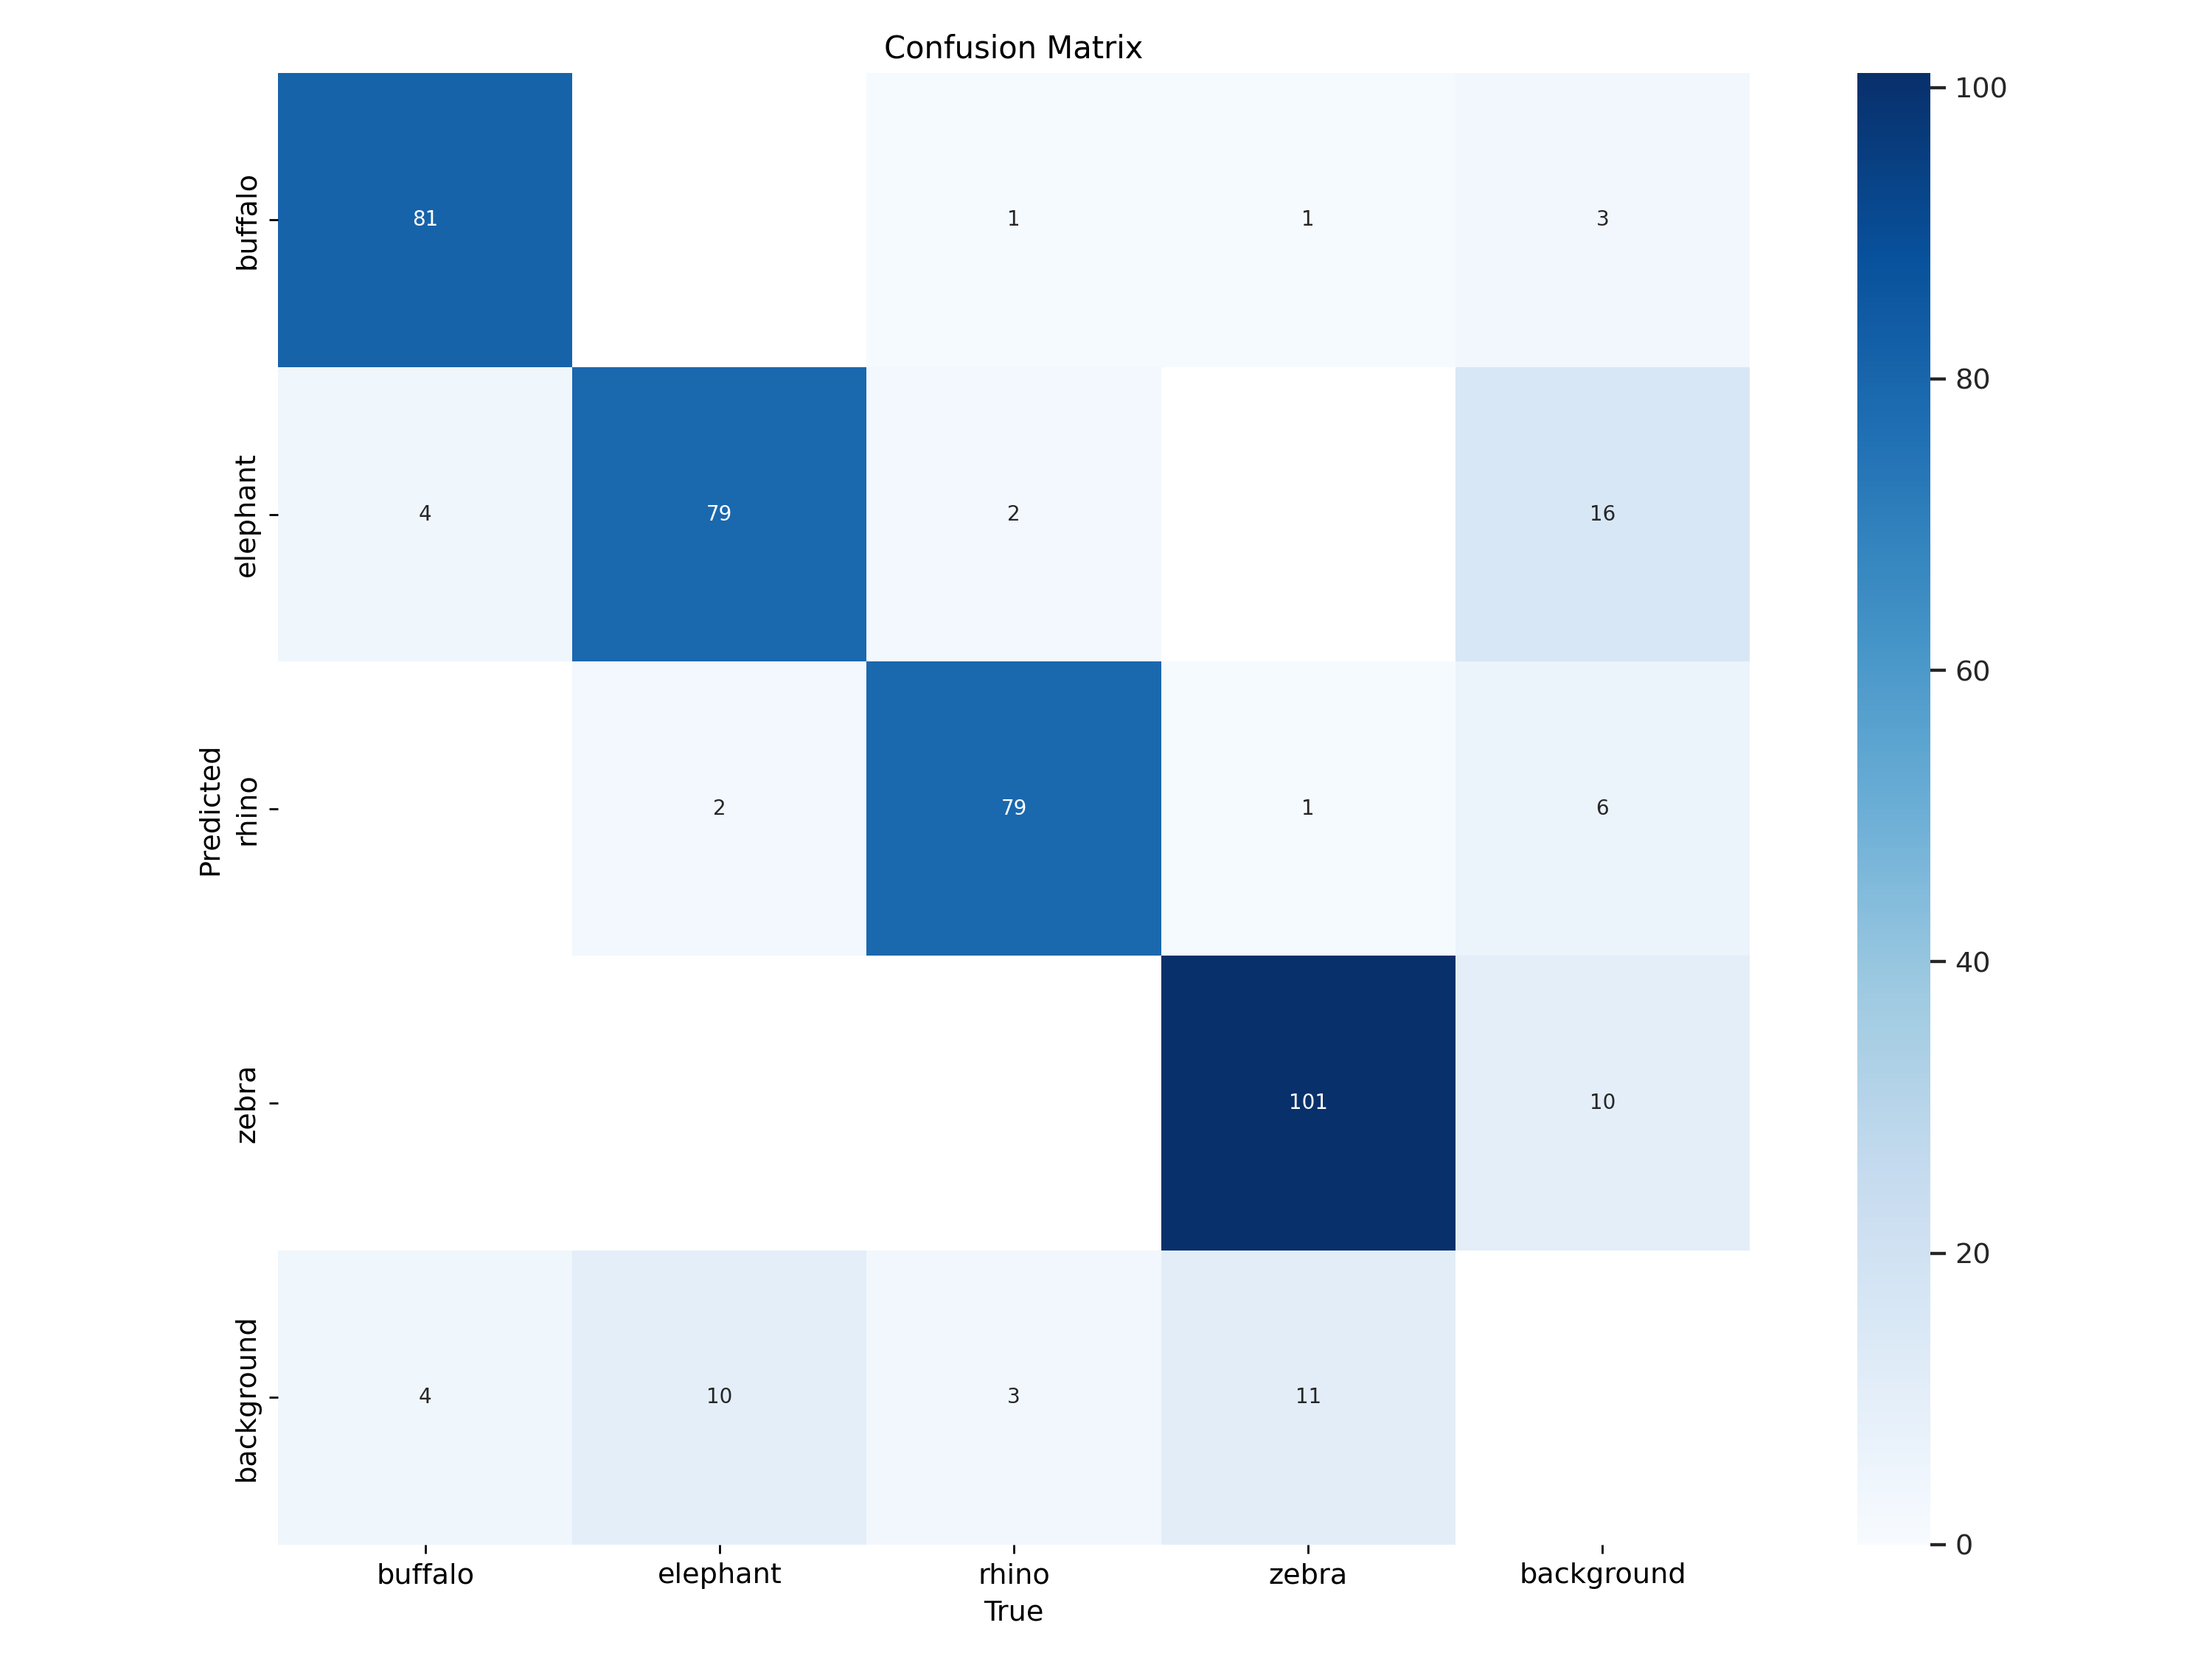

In [39]:
# visualiza as matriz de confusão da validação
Image(filename=f"{validation_results.save_dir}/confusion_matrix.png" , width=1024)

In [41]:
# realiza a predição do modelo
predict_results = model.predict(source="/content/datasets/african-wildlife/test/images", imgsz=640, conf=0.5, save=True)


image 1/227 /content/datasets/african-wildlife/test/images/1 (103).jpg: 544x640 1 buffalo, 60.0ms
image 2/227 /content/datasets/african-wildlife/test/images/1 (121).jpg: 512x640 1 buffalo, 52.9ms
image 3/227 /content/datasets/african-wildlife/test/images/1 (128).jpg: 416x640 1 buffalo, 54.7ms
image 4/227 /content/datasets/african-wildlife/test/images/1 (130).jpg: 448x640 1 buffalo, 64.0ms
image 5/227 /content/datasets/african-wildlife/test/images/1 (131).jpg: 480x640 1 buffalo, 58.3ms
image 6/227 /content/datasets/african-wildlife/test/images/1 (137).jpg: 640x448 (no detections), 54.0ms
image 7/227 /content/datasets/african-wildlife/test/images/1 (144).jpg: 448x640 1 buffalo, 11.7ms
image 8/227 /content/datasets/african-wildlife/test/images/1 (154).jpg: 480x640 (no detections), 11.3ms
image 9/227 /content/datasets/african-wildlife/test/images/1 (168).jpg: 448x640 1 buffalo, 10.2ms
image 10/227 /content/datasets/african-wildlife/test/images/1 (171).jpg: 512x640 1 buffalo, 11.7ms
image 

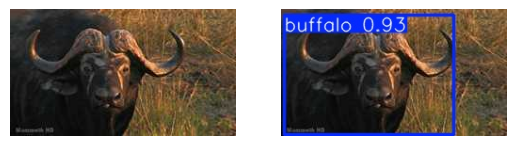

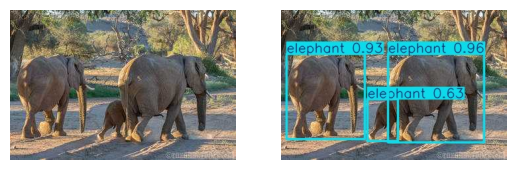

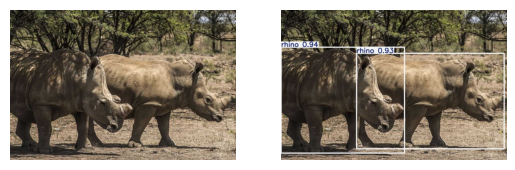

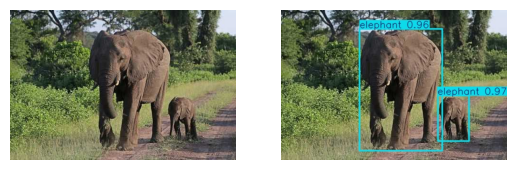

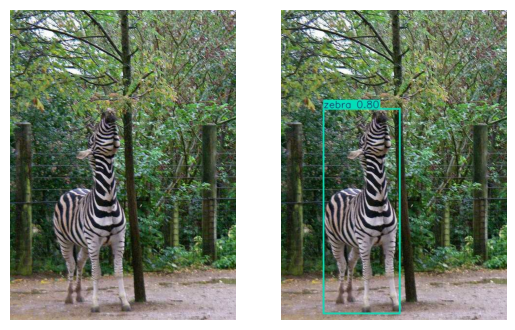

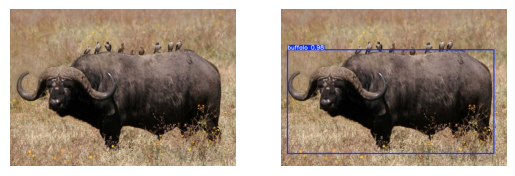

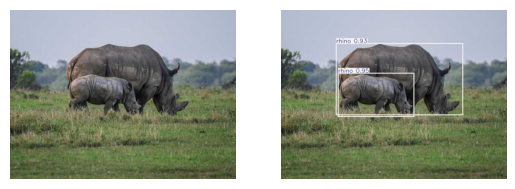

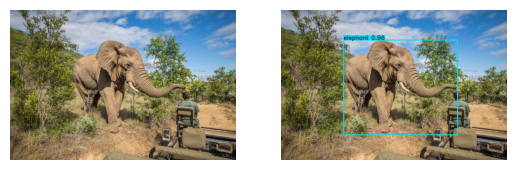

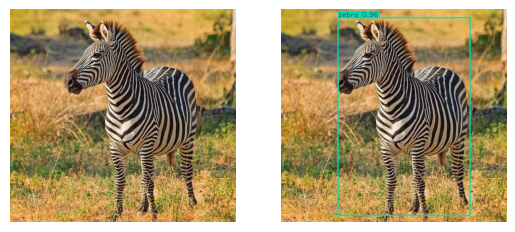

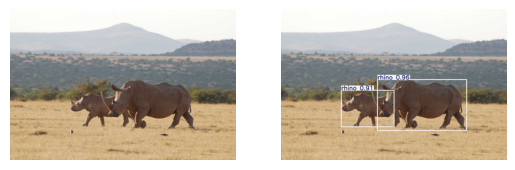

In [53]:
# pega as imagens e aleatóriamente escolhe 10 apenas para visualizarmos como foi
# feita a detecção, imprimindo a imagem original e a detectada, lado a lado.

random_pred_results = random.sample(predict_results, 10)

for result in random_pred_results:
  original_image_path = result.path
  detected_image_path = f"{result.save_dir}" + result.path[result.path.rfind("/"):]

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(mpimg.imread(original_image_path))
  ax[0].axis('off')
  ax[1].imshow(mpimg.imread(detected_image_path))
  ax[1].axis('off')
